# project steps
- importing the dataset
- cleaning dataset
- features distribution
- feature scaling
- visualization
- building linear regression model
- prdict tickets price values


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
#plt.style.use('seaborn') #ggplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
airline = pd.read_excel('Data_Train_Airline_Tickets.xlsx')
airline

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# data cleaning

In [3]:
airline.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
airline.dropna(inplace=True)

In [5]:
airline.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
airline.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
airline.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
airline.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## converting date column from object to date
- after realizing that the date was in 2019 only so we can extract only the month and neglect the year


In [10]:
# converting the date columns in the dataset (object) into timestamp 
airline["Date_of_Journey"] = pd.to_datetime(airline["Date_of_Journey"])
#airline["Arrival_Time"] = pd.to_datetime(airline["Arrival_Time"])
#airline["Dep_Time"] = pd.to_datetime(airline["Dep_Time"])

In [11]:
# checking on the columns after converting into dates
airline.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
# drop the route column from the data set
del airline['Route']

In [13]:
airline.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
#rename in dep_time column 
airline.rename(columns = {'Dep_Time':'take_off_time'}, inplace = True)

In [15]:
airline.head(1)

,Airline,Date_of_Journey,Source,Destination,take_off_time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [16]:
#copy the data set
df=airline.copy()

In [17]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,take_off_time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


## extract day , month only from date column

In [18]:
#splitting the date of journey into day and month columns 
import datetime as dt
df['Journey_day']=df['Date_of_Journey'].dt.day
df['Journey_month']=df['Date_of_Journey'].dt.month

In [19]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,take_off_time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


## converting duration cloumn into seperate hours and seperate minutes
- converting it into timedelta first
- then extract the hours , minutes

In [20]:
#spliting duration column into hours only and minutes only by converting the column first into time delta 
transform=pd.to_timedelta(df['Duration'])
df['hours']=transform.dt.components['hours']
df['minutes']=transform.dt.components['minutes']


In [21]:

df.head(20)

,Airline,Date_of_Journey,Source,Destination,take_off_time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,hours,minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4,45
5,SpiceJet,2019-06-24,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2,25
6,Jet Airways,2019-12-03,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,3,12,15,30
7,Jet Airways,2019-01-03,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,3,1,21,5
8,Jet Airways,2019-12-03,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,3,12,1,30
9,Multiple carriers,2019-05-27,Delhi,Cochin,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,7,50


# dropping un-usefull columns 
- the takeoff, arrival time has no meaning now , i already have the duration hour column instead

In [22]:
# drop duration column and date of journey columns after extraction
del df['Duration']
del df['Date_of_Journey']
del df['take_off_time']
del df['Arrival_Time']

In [23]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,hours,minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,4,45


In [24]:
df.tail()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,hours,minutes
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,4,9,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,3,1,2,40
10682,Air India,Delhi,Cochin,2 stops,No info,11753,5,9,8,20


In [25]:
df['Additional_Info'].nunique()

10

In [26]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### About 83% of values in additional_info colomn is no info , so i will drop it

In [27]:
del df['Additional_Info']

In [28]:
df['Total_Stops'].unique()



array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [29]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

## maping the total stops column

In [30]:
#mapping the total stops column
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
)

In [31]:
df.rename(columns = {'hours':'duration_hours','minutes':'duration_minutes'}, inplace = True)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,4,45


In [33]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Price                int64
Journey_day          int64
Journey_month        int64
duration_hours       int64
duration_minutes     int64
dtype: object

# feature distribution

In [34]:
df.corr()

,Total_Stops,Price,Journey_day,Journey_month,duration_hours,duration_minutes
Total_Stops,1.000000,0.603897,-0.024136,0.065495,0.594057,-0.136706
Price,0.603897,1.000000,-0.165448,0.010705,0.452643,-0.124855
Journey_day,-0.024136,-0.165448,1.000000,-0.264896,-0.027581,-0.007708
Journey_month,0.065495,0.010705,-0.264896,1.000000,0.061320,-0.018597
duration_hours,0.594057,0.452643,-0.027581,0.061320,1.000000,-0.149376
duration_minutes,-0.136706,-0.124855,-0.007708,-0.018597,-0.149376,1.000000


## weak negative corelation between price and journey_day , price and duration_minutes
- drop the colmmns

In [35]:
# drop journey_day,duration_minutes , 
del df['duration_minutes']
del df['Journey_day']

In [36]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [37]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## plotting the relation between airline column and price column
- jet airway business is the highest prices among airlines

<AxesSubplot:xlabel='Airline', ylabel='Price'>

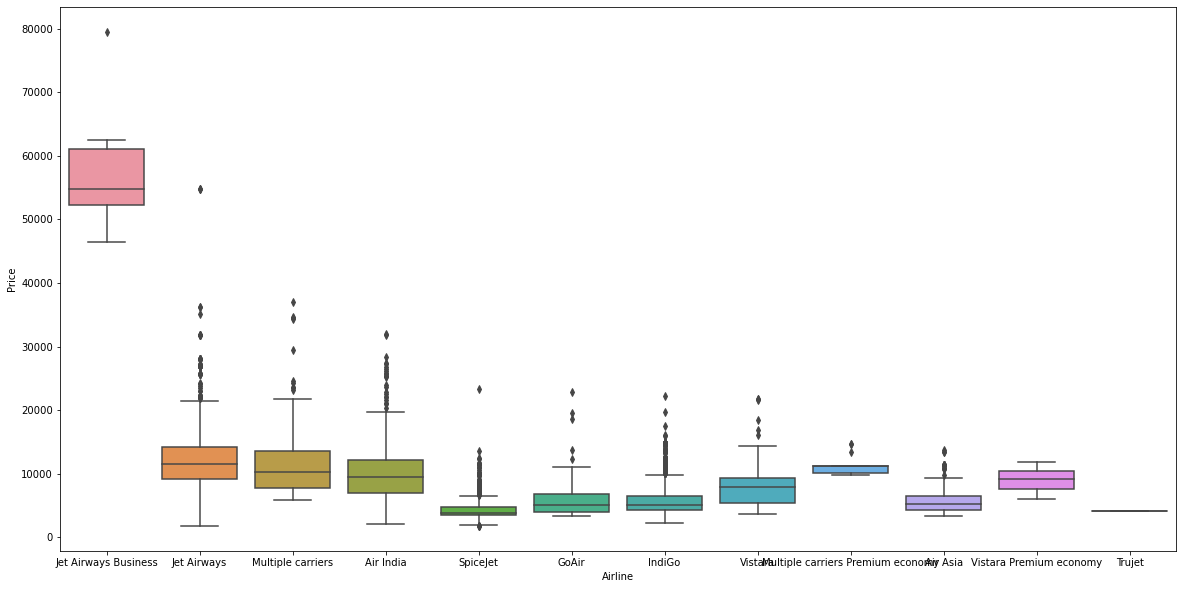

In [38]:
#plotting the relation between airline column and price column --> jet airway business is the highest prices of texts 
plt.figure(figsize=(20,10))
sns.boxplot(data = df.sort_values('Price',ascending=False),x='Airline',y='Price')


In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_month,duration_hours
0,IndiGo,Banglore,New Delhi,0,3897,3,2
1,Air India,Kolkata,Banglore,2,7662,1,7
2,Jet Airways,Delhi,Cochin,2,13882,9,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5
4,IndiGo,Banglore,New Delhi,1,13302,1,4


## plotting the relation between source column and price column
- delhi has the highest tickets prices of source countries

<AxesSubplot:xlabel='Source', ylabel='Price'>

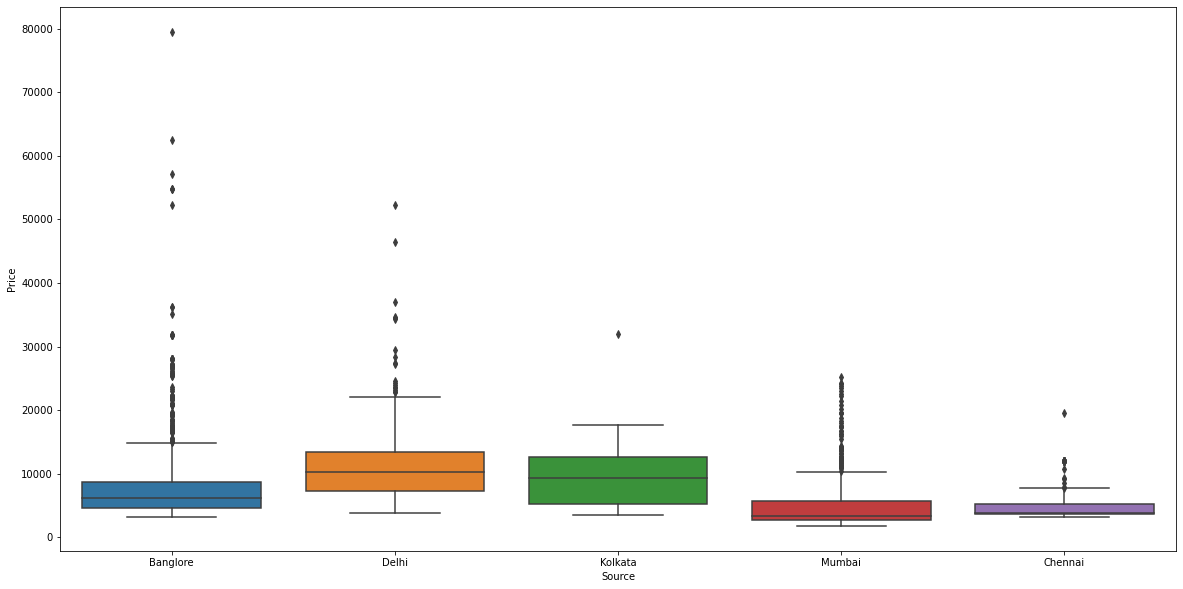

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df.sort_values('Price',ascending=False),x='Source',y='Price')


## plotting the relation between destination column and price column
- new delhi has the highest tickets prices of destination countries

<AxesSubplot:xlabel='Destination', ylabel='Price'>

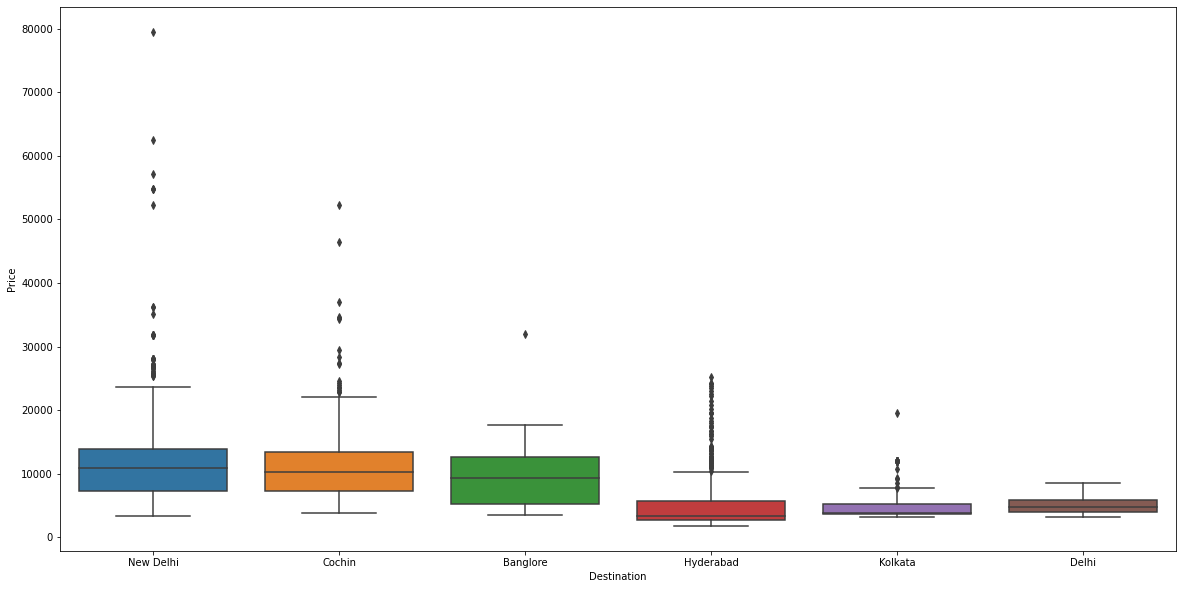

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df.sort_values('Price',ascending=False),x='Destination',y='Price')

## plotting the relation between total stops column and price column
- number of stops affect is directly proportional with the price of tickets

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

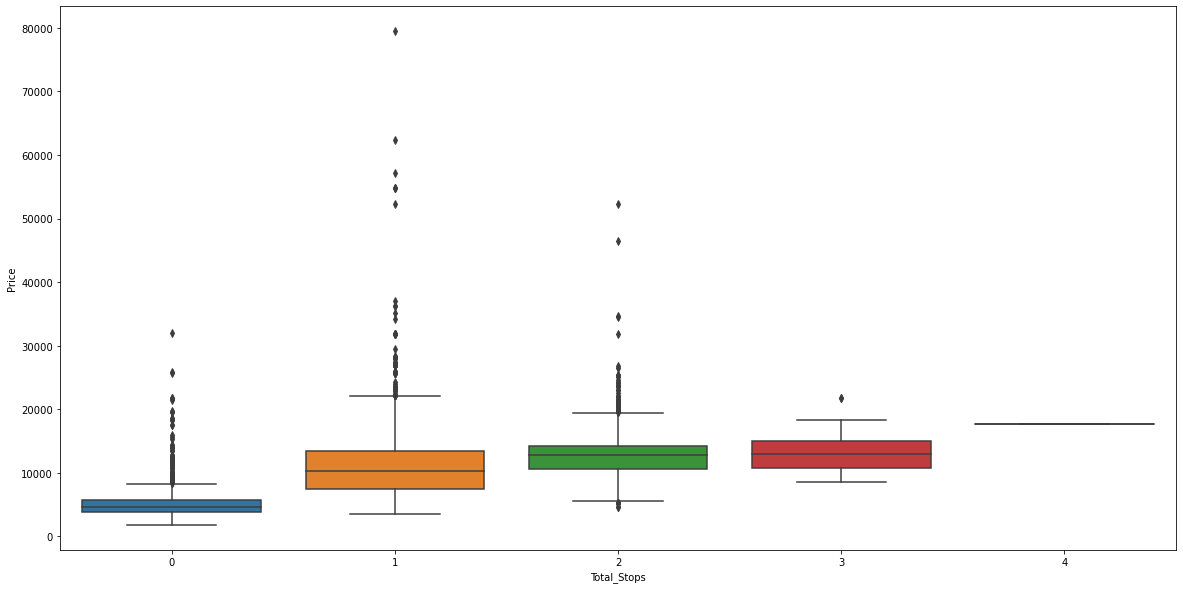

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df.sort_values('Price',ascending=False),x='Total_Stops',y='Price')

<Figure size 432x288 with 0 Axes>

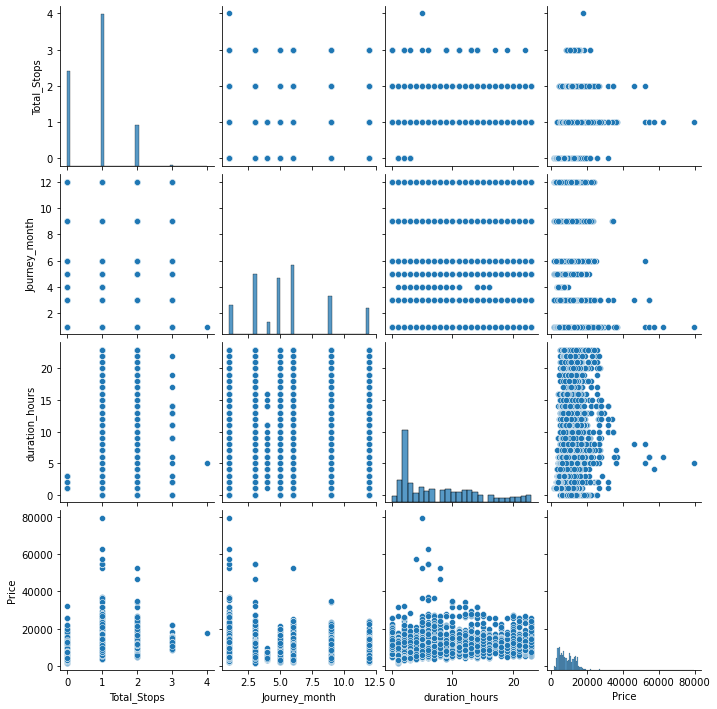

In [43]:
plt.figure()
sns.pairplot(df[["Airline", "Source","Destination","Total_Stops","Journey_month","duration_hours","Price"]]
             , palette='dark', diag_kind="hist")
plt.show()

In [44]:
df.dtypes


Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Journey_month      int64
duration_hours     int64
dtype: object

## transform categorical cols into numeric to be prepared to enter the model

In [45]:
categorical = df.select_dtypes(include=['object'])

In [46]:
categorical.head()

,Airline,Source,Destination
0,IndiGo,Banglore,New Delhi
1,Air India,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin
3,IndiGo,Kolkata,Banglore
4,IndiGo,Banglore,New Delhi


In [47]:
pd.get_dummies(categorical).columns  #drop_first=True

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [48]:
df2 = pd.get_dummies(categorical, drop_first=True)

In [49]:
df2.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
df2 = pd.get_dummies(df, drop_first=True)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_month                              10682 non-null  int64
 3   duration_hours                             10682 non-null  int64
 4   Airline_Air India                          10682 non-null  uint8
 5   Airline_GoAir                              10682 non-null  uint8
 6   Airline_IndiGo                             10682 non-null  uint8
 7   Airline_Jet Airways                        10682 non-null  uint8
 8   Airline_Jet Airways Business               10682 non-null  uint8
 9   Airline_Multiple carriers                  10682 non-null  uint8
 10  Airline_Multiple carriers Premium economy  106

In [52]:
df2.head()

,Total_Stops,Price,Journey_month,duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,7,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,19,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df2['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## the distribution of the price before dealing with outliers

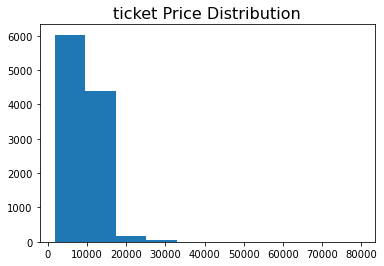

In [54]:
plt.hist(df2['Price'])
plt.title('ticket Price Distribution', size=16)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

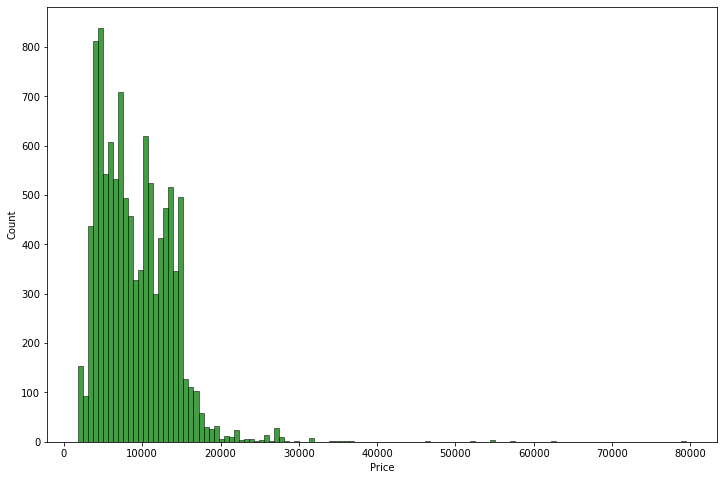

In [55]:
plt.figure(figsize=(12,8))
sns.histplot(df2['Price'] ,color= "g")

C:\Users\Lap Smart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

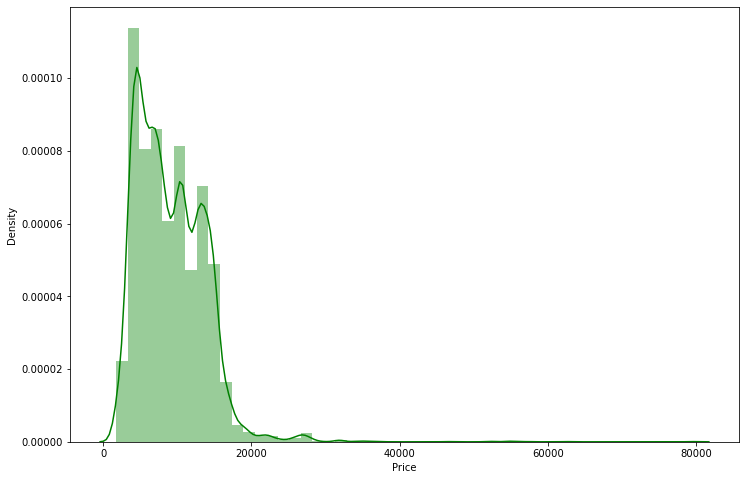

In [56]:
plt.figure(figsize=(12,8))
sns.distplot(df2['Price'] ,color= "g")

## replacing outliers with the median 

In [57]:
df2['Price']=np.where(df2['Price']>=30000,df2['Price'].median(),df2['Price'])

# distribution of price after replacing outliers

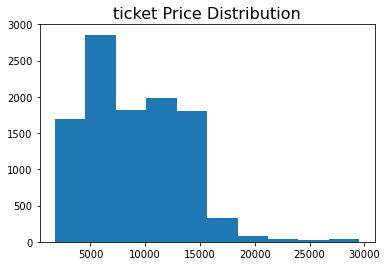

In [58]:
plt.hist(df2['Price'])
plt.title('ticket Price Distribution', size=16)
plt.show()

C:\Users\Lap Smart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

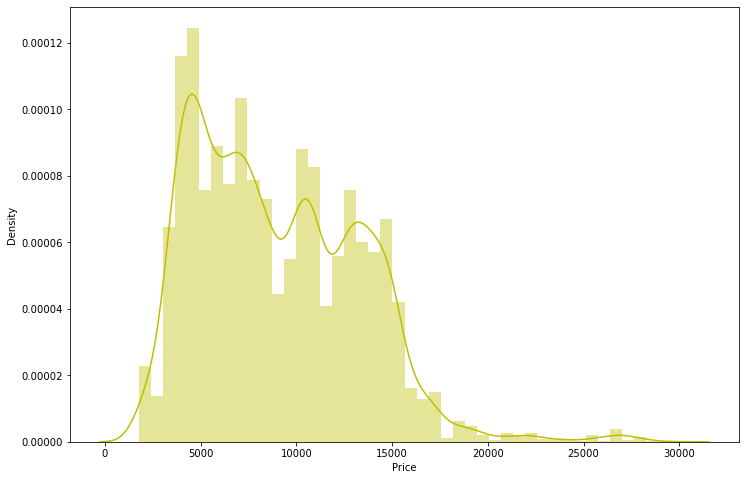

In [59]:
plt.figure(figsize=(12,8))
sns.distplot(df2['Price'] ,color= "y")

<AxesSubplot:xlabel='Price', ylabel='Count'>

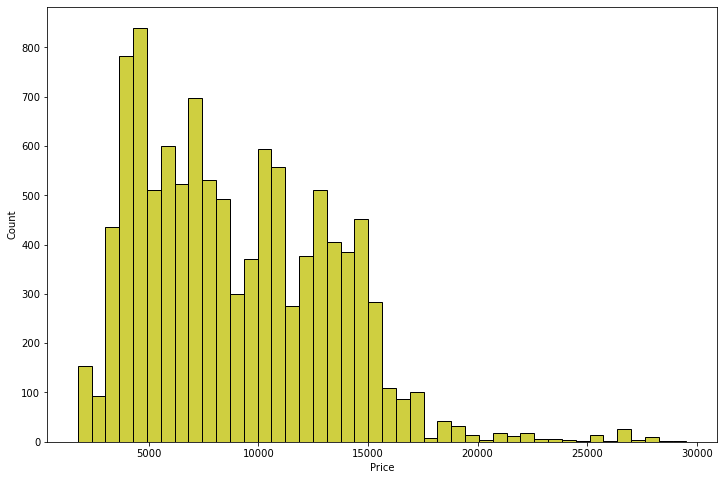

In [60]:
plt.figure(figsize=(12,8))
sns.histplot(df2['Price'] ,color= "y")

# splitting data set

In [61]:
x = df2.drop('Price', axis=1)
y = pd.DataFrame(df2['Price'])

In [62]:
x.head()

,Total_Stops,Journey_month,duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,7,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,19,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
y.head()

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42) #y_test w el x_test dol 0.3 mn el data , random state ba2a de 3shwa2y law el data bta3ty range bta3ha kbeer aw ma3molha sorting aw 7aga 

In [65]:
print(x_train.shape)
x_train.head()

(8545, 23)


,Total_Stops,Journey_month,duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10005,1,5,10,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3684,1,9,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1034,1,4,6,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3909,1,3,12,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3088,2,6,2,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [66]:
print(y_train.shape)
y_train.head()

(8545, 1)


,Price
10005,9149.0
3684,12373.0
1034,5583.0
3909,7695.0
3088,11972.0


In [67]:
x_test.shape, y_test.shape

((2137, 23), (2137, 1))

# numeric scaling

In [68]:
#Normalization: (X-X.min())/(X.max()-X.min())
#Standardization: (X-X.mean())/X.std()

scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [69]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)

In [70]:
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [71]:
y_train

,Price
10005,9149.0
3684,12373.0
1034,5583.0
3909,7695.0
3088,11972.0
...,...
5734,12242.0
5191,10844.0
5390,7670.0
860,6144.0


In [72]:
y_train_sc

array([[0.2661241 ],
       [0.38222478],
       [0.13770752],
       ...,
       [0.21286326],
       [0.1579099 ],
       [0.30620476]])

# apply linear regression

In [73]:
lr_model = LinearRegression()
lr_model.fit(x_train_sc, y_train_sc)
y_pred_sc = lr_model.predict(x_test_sc) #badelo el x test 3shan tbrdect el y w a compare el y_test bl y_pred eli 3ndy

In [74]:
y_test_sc

array([[0.53642551],
       [0.11523641],
       [0.26749253],
       ...,
       [0.20501278],
       [0.2544204 ],
       [0.44625302]])

In [75]:
y_pred_sc

array([[0.4175415 ],
       [0.20483398],
       [0.27612305],
       ...,
       [0.19891357],
       [0.35791016],
       [0.34765625]])

In [76]:
mae = mean_absolute_error(y_test_sc, y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc, y_pred_sc))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  0.0715
RMSE =  0.1016


## error margin

In [77]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))

Actual MAE =  1984
Actual RMSE =  2821


## prediction results

In [78]:
y_test_inv

array([[16655.],
       [ 4959.],
       [ 9187.],
       ...,
       [ 7452.],
       [ 8824.],
       [14151.]])

In [79]:
y_pred_inv

array([[13353.71002197],
       [ 7447.03491211],
       [ 9426.66088867],
       ...,
       [ 7282.63104248],
       [11697.80712891],
       [11413.06640625]])

In [80]:
lr_model.score(x_test_sc,y_test_sc)

0.583374585061216

## conclusion and insights 
- jet airway business has the highest prices among airlines
- delhi has the highest tickets prices of source countries
- new delhi has the highest tickets prices of destination countries 
- number of stops affect is directly proportional with the price of tickets
- number of duration hours affect is directly proportional with the price of tickets
- model accuracy of predection is 58% 